In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [14]:
car_dataset=pd.read_csv('/content/car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_dataset.shape

(301, 9)

In [15]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
 print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Car_Name.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
categorical_column = 'Car_Name'
encoder = LabelEncoder()
encoder.fit(car_dataset[categorical_column])
car_dataset[categorical_column] = encoder.transform(car_dataset[categorical_column])

In [19]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,0,0,0,0
1,93,2013,4.75,9.54,43000,1,0,0,0
2,68,2017,7.25,9.85,6900,0,0,0,0
3,96,2011,2.85,4.15,5200,0,0,0,0
4,92,2014,4.60,6.87,42450,1,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
car_dataset[numerical_features] = scaler.fit_transform(car_dataset[numerical_features])

In [23]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [25]:
print(X)

         Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0    0.128897      -0.236215   -0.256224          0            0   
1   -0.217514       0.221505    0.155911          1            0   
2    1.168129       0.257427   -0.773969          0            0   
3   -0.910335      -0.403079   -0.817758          0            0   
4    0.128897      -0.087890    0.141743          1            0   
..        ...            ...         ...        ...          ...   
296  0.821718       0.460214   -0.076225          1            0   
297  0.475308      -0.200292    0.593804          0            0   
298 -1.603156       0.390687    1.313340          0            0   
299  1.168129       0.564504   -0.719876          1            0   
300  0.821718      -0.200292   -0.810958          0            0   

     Transmission  Owner  
0               0      0  
1               0      0  
2               0      0  
3               0      0  
4               0      0  
..            ...    

In [27]:
print(y)

0     -0.258416
1      0.017481
2      0.510154
3     -0.356950
4     -0.012079
         ...   
296    0.953559
297   -0.130321
298   -0.258416
299    1.347698
300    0.125869
Name: Selling_Price, Length: 301, dtype: float64


In [28]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,0.128897,-0.258416,-0.236215,-0.256224,0,0,0,0
1,93,-0.217514,0.017481,0.221505,0.155911,1,0,0,0
2,68,1.168129,0.510154,0.257427,-0.773969,0,0,0,0
3,96,-0.910335,-0.356950,-0.403079,-0.817758,0,0,0,0
4,92,0.128897,-0.012079,-0.087890,0.141743,1,0,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

**linear** **regression**

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.08350297065770214
R-squared Score: 0.8365766715024997


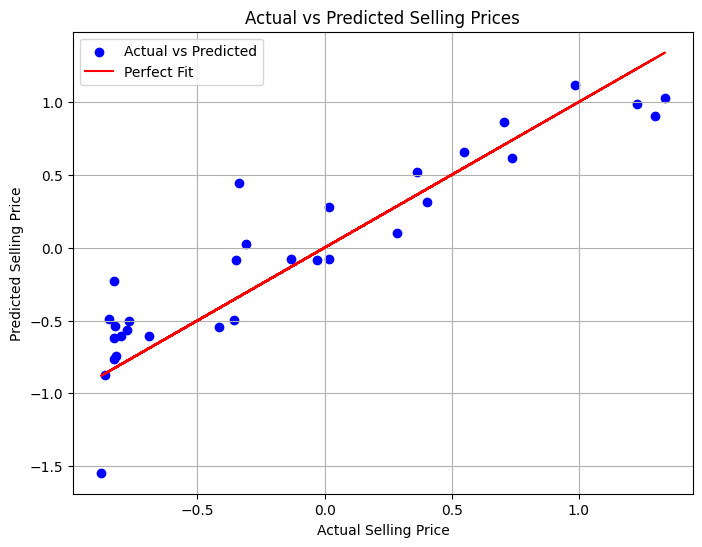

In [31]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

**2**.**lasso** **regression**


In [32]:
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization
lasso_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (Lasso):", mse_lasso)
print("R-squared Score (Lasso):", r2_lasso)

Mean Squared Error (Lasso): 0.0780770287209133
R-squared Score (Lasso): 0.8471957606745377


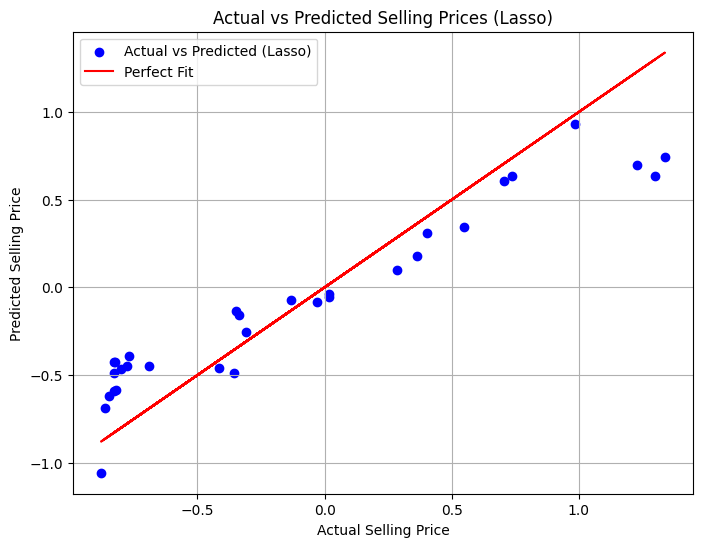

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', label='Actual vs Predicted (Lasso)')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Selling Prices (Lasso)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

**svm** **(support vector** **machine**)

In [34]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)  # You can adjust parameters like kernel, C, and epsilon
svr_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Mean Squared Error (SVR):", mse_svr)
print("R-squared Score (SVR):", r2_svr)

Mean Squared Error (SVR): 0.0547630801490416
R-squared Score (SVR): 0.892823395787701


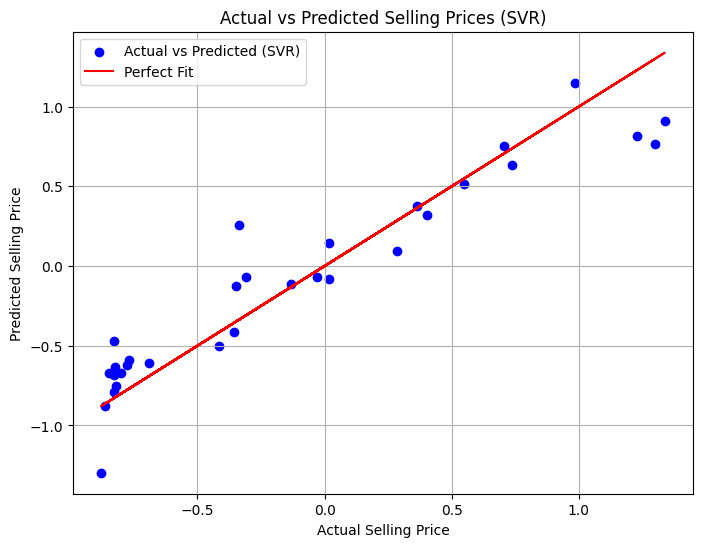

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Actual vs Predicted (SVR)')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Selling Prices (SVR)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

knn


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Squared Error (KNN):", mse_knn)
print("R-squared Score (KNN):", r2_knn)

Mean Squared Error (KNN): 0.07426238058026488
R-squared Score (KNN): 0.85466139322966


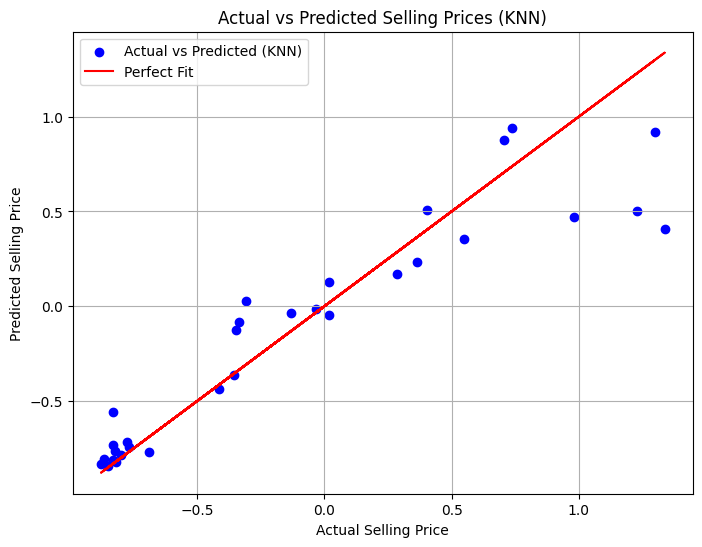

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='Actual vs Predicted (KNN)')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Selling Prices (KNN)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

**decision** **tree**


In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Mean Squared Error (Decision Tree):", mse_decision_tree)
print("R-squared Score (Decision Tree):", r2_decision_tree)

Mean Squared Error (Decision Tree): 0.021887856691015676
R-squared Score (Decision Tree): 0.9571633635791839


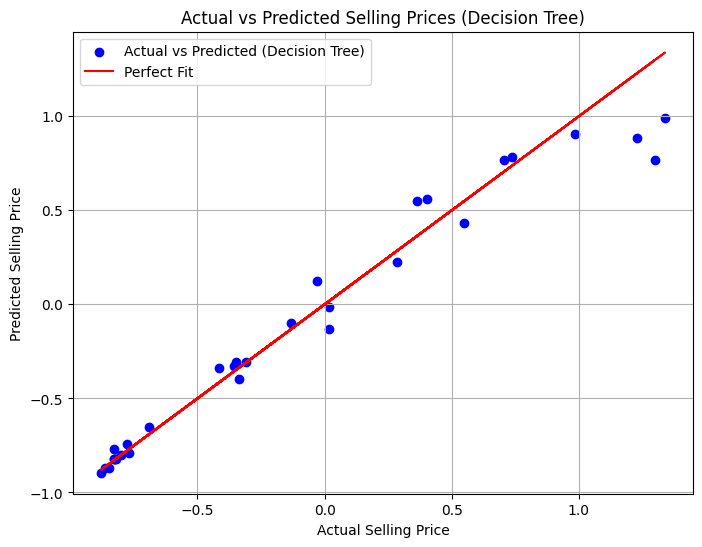

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_decision_tree, color='blue', label='Actual vs Predicted (Decision Tree)')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Selling Prices (Decision Tree)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

**random** **forest**

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Mean Squared Error (Random Forest):", mse_random_forest)
print("R-squared Score (Random Forest):", r2_random_forest)

Mean Squared Error (Random Forest): 0.00993635075286435
R-squared Score (Random Forest): 0.9805536078493758


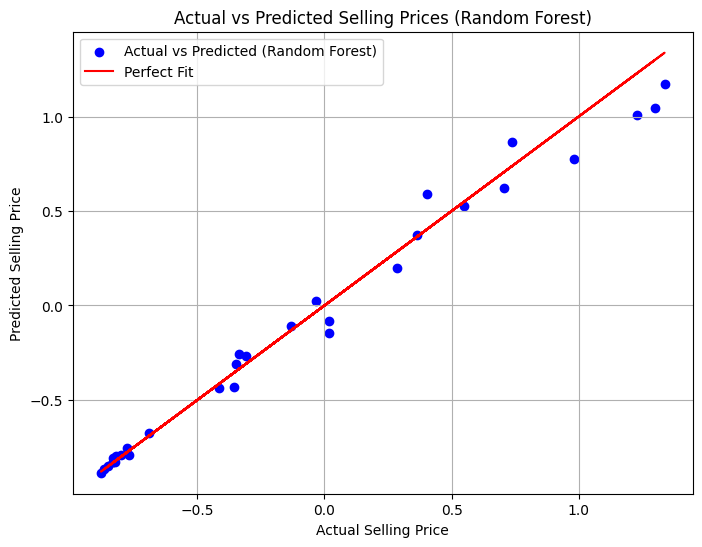

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_random_forest, color='blue', label='Actual vs Predicted (Random Forest)')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.title('Actual vs Predicted Selling Prices (Random Forest)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()